In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rewards = np.array([
    [5.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]
])
grid_size = (4,4)
actions = ["up", "down", "left", "right"]

Vの初期化

In [3]:
v = np.zeros(grid_size)
v

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [4]:
def move(x,y,a):
    if a == "up" and x > 0:
        return x-1,y
    if a =="down" and x < grid_size[0] - 1:
        return x+1,y
    if a == "left" and y > 0:
        return x,y-1
    if a == "right" and y < grid_size[1] - 1:
        return x,y+1
    return x,y

In [5]:
update_history = []
for i in range(100):
    v_new = np.zeros(grid_size)  # 反復ごとに初期化
    for x in range(grid_size[0]):
        for y in range(grid_size[1]):
            for a in actions:
                x_new, y_new = move(x, y, a)
                v_new[x, y] += 0.25 * (rewards[x_new, y_new] + v[x_new, y_new])  # 報酬の位置修正
    v = v_new.copy()  # 配列を更新
    if i %5 ==0:
        update_history.append(v.copy())


In [6]:
v

array([[40.84821346, 36.4732137 , 31.74107119, 29.6875    ],
       [36.4732137 , 33.0803568 , 30.3125    , 28.88392881],
       [31.74107119, 30.3125    , 28.7946432 , 27.9017863 ],
       [29.6875    , 28.88392881, 27.9017863 , 27.27678654]])

<Axes: >

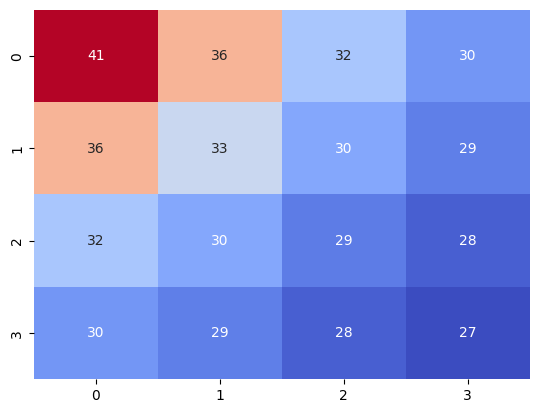

In [7]:
sns.heatmap(v, annot=True, cmap="coolwarm", cbar=False)

In [10]:
len(update_history)

20

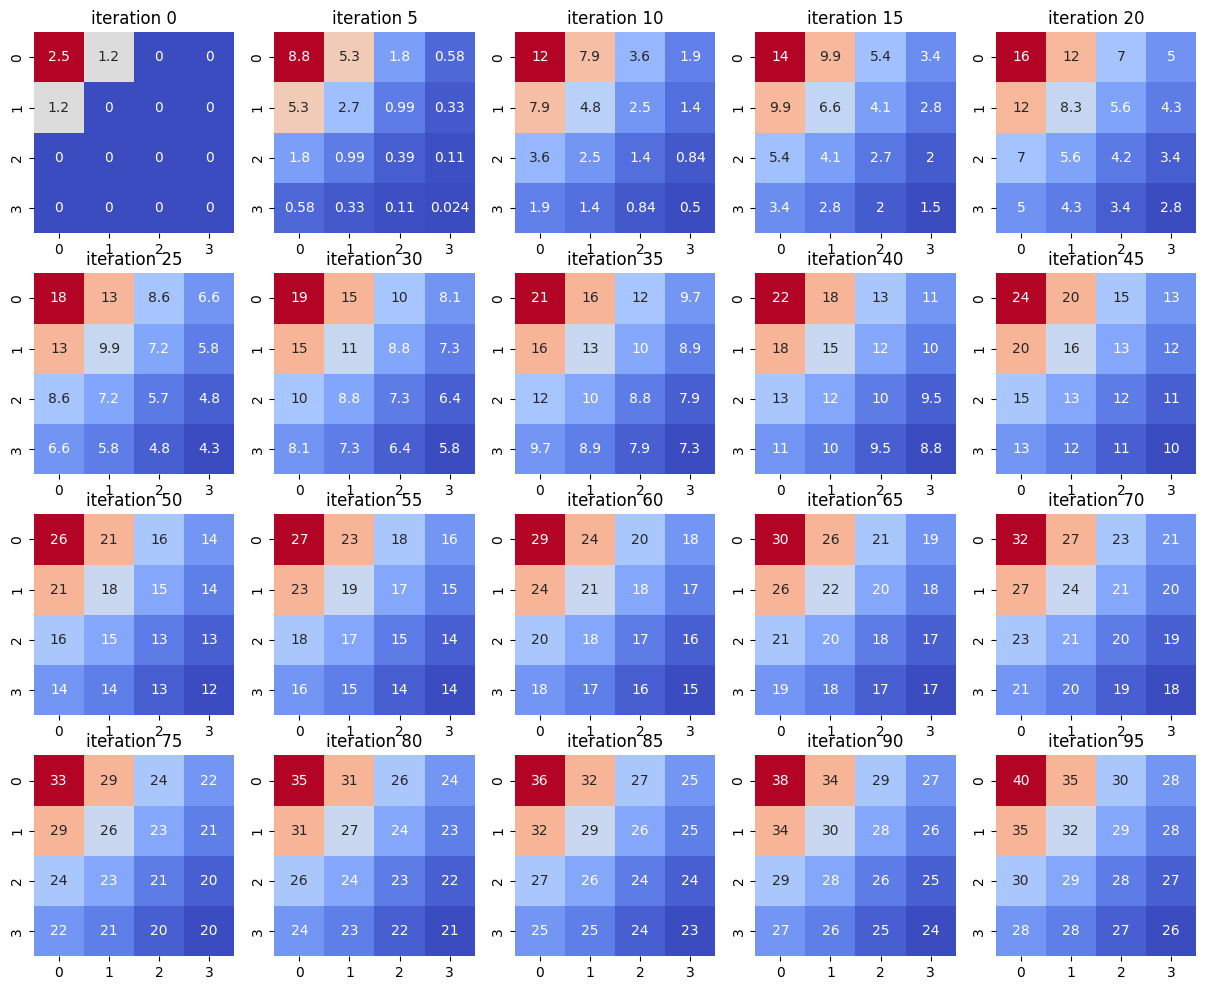

In [18]:

plt.figure(figsize=(15, 12))
for i, v in enumerate(update_history):
    plt.subplot(4,5,i+1)
    sns.heatmap(v, annot=True, cmap="coolwarm", cbar=False)
    plt.title(f"iteration {i*5}")
plt.show()